In [2]:
import pandas as pd
import matplotlib.pyplot as mpt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


###### DATA COLLECTION 

In [3]:
data = pd.read_csv("Wine.csv")

In [4]:
data.shape

(1599, 12)

In [5]:
data.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.500,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0


# FINDING OUT THE CORRELATION

In [6]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.112792,0.668047,0.027553,0.183006,-0.061668,0.123987
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076703,0.022026,-0.046456,-0.260987,-0.202288,-0.390258
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035084,0.364947,0.008415,0.312770,0.109903,0.225867
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.200939,0.355283,0.040013,0.005527,0.042075,0.013756
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047815,0.200632,-0.258644,0.371260,-0.221141,-0.129011
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.668152,-0.021946,-0.025389,0.051658,-0.069408,-0.050899
total sulfur dioxide,-0.112792,0.076703,0.035084,0.200939,0.047815,0.668152,1.000000,0.070750,-0.162776,0.042109,-0.205914,-0.184699
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.070750,1.000000,-0.037946,0.148506,-0.496180,-0.174741
pH,0.027553,-0.046456,0.008415,0.040013,-0.258644,-0.025389,-0.162776,-0.037946,1.000000,-0.260525,0.233479,0.133961
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042109,0.148506,-0.260525,1.000000,0.093595,0.251118


## FINDING MISSING VALUES

In [7]:
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
(data.isnull()).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [9]:
missing_vals = pd.isnull(data["quality"])

In [10]:
data[missing_vals]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
123,8.0,0.71,0.0,2.6,0.08,11.0,34.0,0.9976,3.44,0.53,9.5,NaN


In [11]:
missing_vals = pd.isnull(data["total sulfur dioxide"])

In [12]:
data[missing_vals]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.5,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.8,10.5,5.0


###### DROPPING THE ROWS HAVING NULL VALUES AS NUMBER OF THOSE ROWS IS VERY VERY LESS COMPARED TO THE TOTAL ROWS SO IT WONT AFFECT OUR MODEL

In [13]:
data.dropna(axis=0, how='any', inplace=True)

In [14]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5.0


### DATA ANALYSIS AND ITS VISUALISATION

In [15]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [16]:
data.mean()

fixed acidity            8.321366
volatile acidity         0.527666
citric acid              0.271128
residual sugar           2.536936
chlorides                0.087487
free sulfur dioxide     15.882206
total sulfur dioxide    46.431078
density                  0.996745
pH                       3.498716
sulphates                0.658189
alcohol                 10.424217
quality                  5.636591
dtype: float64

# QUALITY ANALYSIS

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


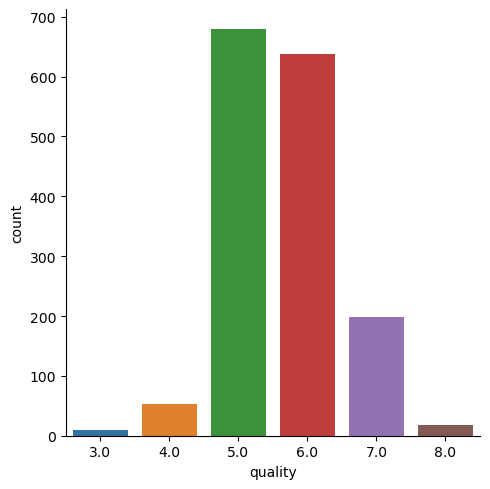

In [17]:
sb.catplot(x='quality', data = data, kind = 'count')

<Axes: xlabel='quality', ylabel='pH'>

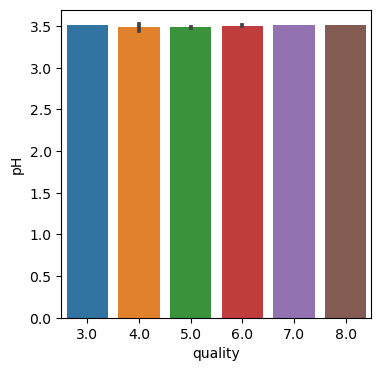

In [18]:
#Plotting a graph of pH vs the wine quality to further understand the correlation that we found out above

pH_plot = mpt.figure(figsize=(4,4))
sb.barplot(x = 'quality', y = 'pH', data = data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

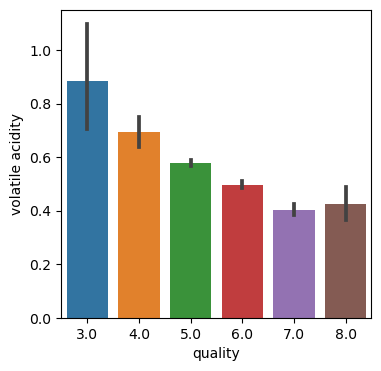

In [19]:
#Plotting another graph of volatile acidity vs the wine quality to further understand the correlation that we found out 

plot = mpt.figure(figsize=(4,4))
sb.barplot(x = 'quality', y = 'volatile acidity', data = data)

<Axes: xlabel='quality', ylabel='citric acid'>

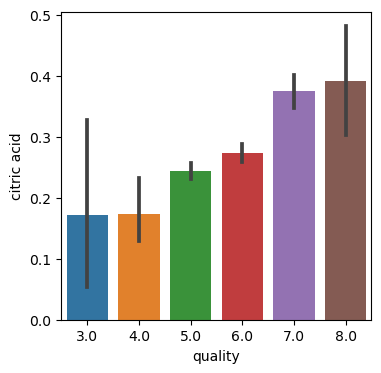

In [20]:
#Plotting another graph of citric acid vs the wine quality to further understand the correlation that we found out

plot = mpt.figure(figsize=(4,4))
sb.barplot(x = 'quality', y = 'citric acid', data = data)

#Directly proportional

<Axes: xlabel='quality', ylabel='alcohol'>

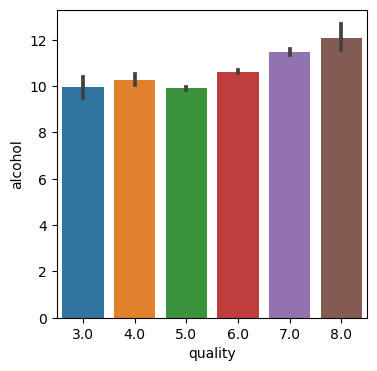

In [21]:
#Plotting another graph of alcohol vs the wine quality to further understand the correlation that we found out
plot = mpt.figure(figsize=(4,4))
sb.barplot(x = 'quality', y = 'alcohol', data = data)

#Directly proportional

<Axes: xlabel='quality', ylabel='density'>

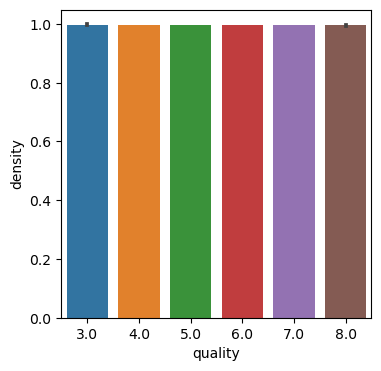

In [22]:
#Plotting another graph of density vs the wine quality to further understand the correlation that we found out
plot = mpt.figure(figsize=(4,4))
sb.barplot(x = 'quality', y = 'density', data = data)

###### In-depth understanding of the correlation 

In [23]:
cor = data.corr()

<Axes: >

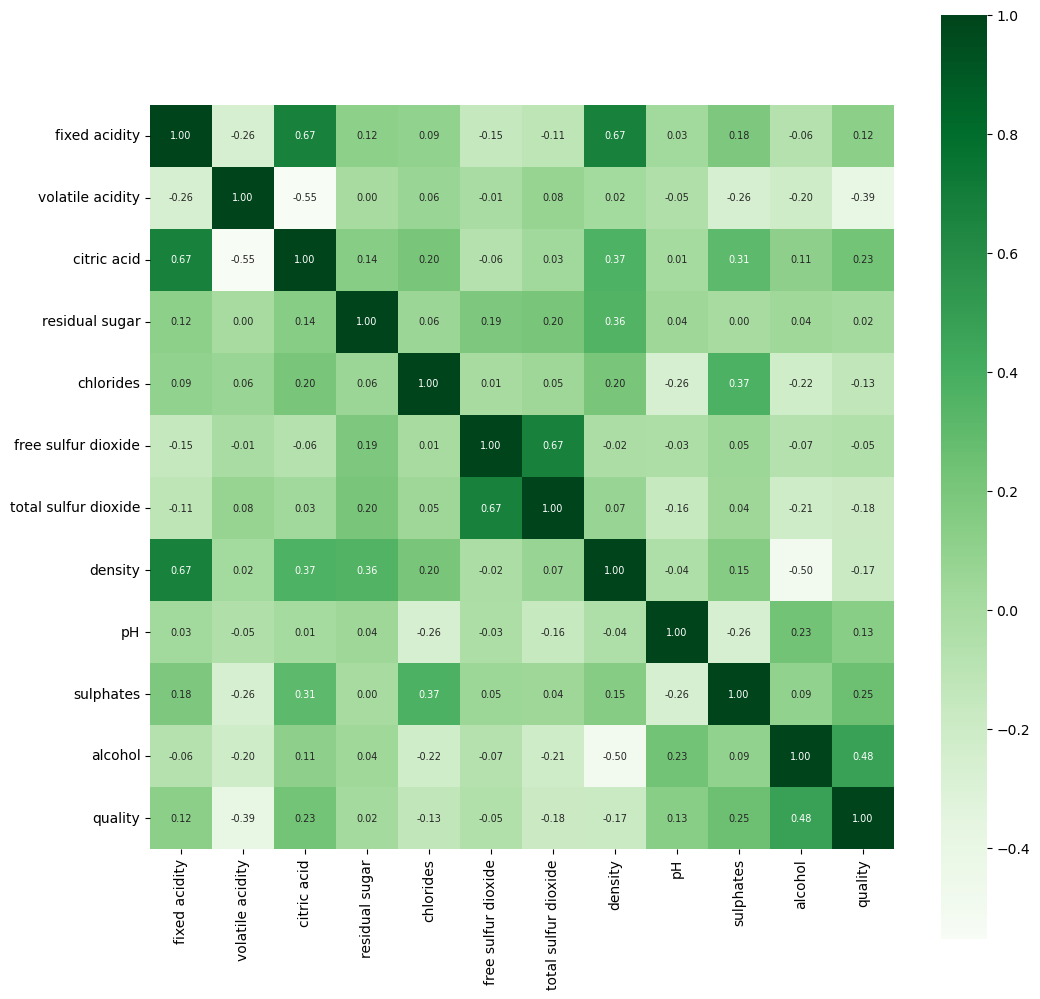

In [24]:
mpt.figure(figsize=(12,12))
sb.heatmap(cor,cbar=True, square=True, fmt = '.2f', annot=True, annot_kws={'size':7}, cmap = 'Greens' )

### DATA PREPROCESSING

In [25]:
rest = data.drop('quality', axis=1)

In [26]:
rest

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2


In [28]:
quality = data['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)


# Segregating the wine quality in two types: 
# 0--> Quality less than or equal to 6
# 1--> Quality greater than 6


In [29]:
quality

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1596, dtype: int64

In [30]:
quality.value_counts()

quality
1    854
0    742
Name: count, dtype: int64

##### MACHINE LEARNING MODEL 

In [31]:
train1, test1, train2, test2 = train_test_split(rest,quality,test_size=0.15, random_state=2)

In [32]:
print(quality.shape, train2.shape, test2.shape)

(1596,) (1356,) (240,)


In [33]:
#First training to our model

wineModel = RandomForestClassifier()

In [34]:
wineModel.fit(train1, train2)

RandomForestClassifier()

In [35]:
#further training and evaluation

test1_pred = wineModel.predict(test1)
test_accuracy = accuracy_score(test1_pred, test2)

In [36]:
print("Accuracy achieved is ", test_accuracy)

Accuracy achieved is  0.8375


######                                                                                     PREDICTION MODEL

In [37]:
inp = (8.1,0.38,0.28,2.1,0.066,13,30,0.9968,3.23,0.73,9.7)
#input without quality

inp_np = np.asarray(inp)

reshaped = inp_np.reshape(1, -1)

make_prediction = wineModel.predict(reshaped)


C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
print("Wine Quality is: ", make_prediction)
print()

Wine Quality is:  [1]



In [39]:
if(make_prediction[0]==1):
    print("It has a good quality")

else:
    print("It has a bad quality")
    

It has a good quality


In [40]:
inp = (7.9,0.43,0.21,1.6,0.106,10,37,0.9966,3.17,0.91,9.5)
#Having a bad quality

inp_np = np.asarray(inp)

reshaped = inp_np.reshape(1, -1)

make_prediction = wineModel.predict(reshaped)

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
print("Wine Quality is: ", make_prediction)
print()

Wine Quality is:  [0]



In [42]:
if(make_prediction[0]==1):
    print("It has a good quality")

else:
    print("It has a bad quality")
    

It has a bad quality


In [43]:
inp = (6.9,0.5,0.11,2.0,0.110,15,30,0.980,3.12,0.94,9.8)
#Having a bad quality

inp_np = np.asarray(inp)

reshaped = inp_np.reshape(1, -1)

make_prediction = wineModel.predict(reshaped)

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
print("Prediction value is: ", make_prediction)

Prediction value is:  [0]
